## BREAST CANCER

## Import library

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from  sklearn.preprocessing  import  StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline,make_pipeline
import pandas as   pd
import matplotlib.pyplot as  plt
import seaborn as sns
import numpy as np

## Loading Data

In [ ]:
data=pd.read_csv("/content/breast_cancer(2).csv")

##**Data Preprocessing**

# 1. Data Cleaning

In [ ]:
data.drop(["id"],axis=1,inplace=True)
data.drop(["Unnamed: 32"],axis=1,inplace=True)
data.fillna(0,inplace=True)
data.tail(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.3514,0.152,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.265,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.0000,0.000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.000,0.2871,0.07039


In [ ]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# 2. Outlier Detection

<Axes: ylabel='area_mean'>

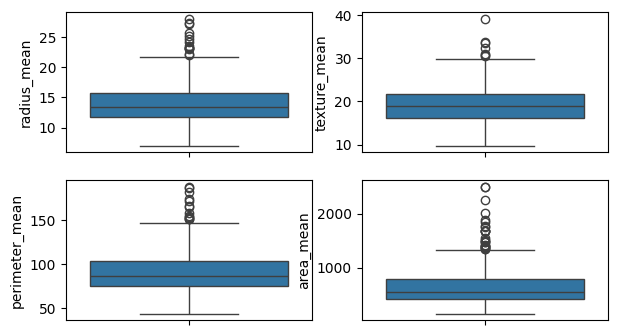

In [ ]:
axis,fig=plt.subplots(2,2,figsize=(7,4))
sns.boxplot(data['radius_mean'],ax=fig[0][0])
sns.boxplot(data['texture_mean'],ax=fig[0][1])
sns.boxplot(data['perimeter_mean'],ax=fig[1][0])
sns.boxplot(data['area_mean'],ax=fig[1][1])

# 3. Outliers Removing

In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

columns_to_check = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
for col in columns_to_check:
    data = remove_outliers_iqr(data,col)

# **Feature Engineering**

# 1. Spliting Data


In [ ]:
feture=data.drop(['diagnosis'],axis=1)
target=data['diagnosis']
train_feture,test_feture,train_target,test_target=train_test_split(feture,target,test_size=0.2,random_state=42)

# 2. Transformation

In [ ]:
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])
le=LabelEncoder()
le.fit(['M','B'])
le.inverse_transform([0,1])

array(['B', 'M'], dtype='<U1')

# 3. Feature Scalling (Standardization)

In [ ]:
scaling=StandardScaler()
train_feture_scaled=scaling.fit_transform(train_feture)
test_feture_scaled=scaling.transform(test_feture)



# Model Traning

In [ ]:
# model=KNeighborsClassifier()
model=LogisticRegression()
model.fit(train_feture_scaled,train_target)

LogisticRegression()

# 4. Prediction

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga'] # Solvers compatible with both penalties
}

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_feture_scaled, train_target)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(test_feture_scaled)

print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)
print("Confusion Matrix:\n",confusion_matrix(test_target,predictions))
print("Classification Report:\n",classification_report(test_target,predictions))

Best hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best accuracy: 0.9804878048780488
Confusion Matrix:
 [[71  0]
 [ 4 28]]
Classification Report:
               precision    recall  f1-score   support

           B       0.95      1.00      0.97        71
           M       1.00      0.88      0.93        32

    accuracy                           0.96       103
   macro avg       0.97      0.94      0.95       103
weighted avg       0.96      0.96      0.96       103



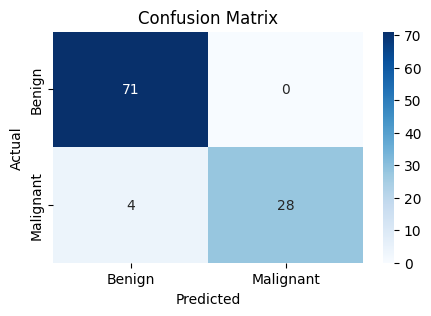

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_target, predictions)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Data Visualisation

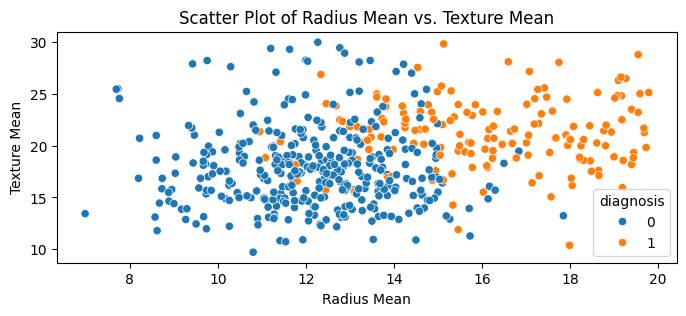

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=data)
plt.title('Scatter Plot of Radius Mean vs. Texture Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.show()


###  USER INPUT MODEL TESTING

In [ ]:
feture=data.iloc[:,1:5]
target=data['diagnosis']
train_feture,test_feture,train_target,test_target=train_test_split(feture,target,test_size=0.2,random_state=42)

le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])
le=LabelEncoder()
le.fit(['M','B'])
le.inverse_transform([0,1])

scaling=StandardScaler()
train_feture_scaled=scaling.fit_transform(train_feture)
test_feture_scaled=scaling.fit_transform(test_feture)

model=LogisticRegression()
model.fit(train_feture_scaled,train_target)

pred=model.predict(test_feture_scaled)

print("Accuracy:",accuracy_score(test_target,pred))
print("Confusion Matrix:\n",confusion_matrix(test_target,pred))
print("Classification Report:\n",classification_report(test_target,pred))

Accuracy: 0.9029126213592233
Confusion Matrix:
 [[66  5]
 [ 5 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        71
           1       0.84      0.84      0.84        32

    accuracy                           0.90       103
   macro avg       0.89      0.89      0.89       103
weighted avg       0.90      0.90      0.90       103



## Function For User Input

In [ ]:

def predict_user_input():

  user_input = []  # Initialize an empty list inside the function
  value = float(input(f"Enter the Radius value: "))
  user_input.append(value)
  value = float(input(f"Enter the Texture value: "))
  user_input.append(value)
  value = float(input(f"Enter the Perimeter value: "))
  user_input.append(value)
  value = float(input(f"Enter the Area value: "))
  user_input.append(value)

  user_input_array=np.array(user_input).reshape(1,-1)
  user_input_scal=scaling.transform(user_input_array)
  user_input_pred=model.predict(user_input_scal)
  # Instead of inverse_transform, get the predicted class directly
  prediction = user_input_pred[0]  # Assuming user_input_pred is a single-element array
  # Map the prediction to 'M' or 'B'
  prediction = 'M' if prediction == 1 else 'B'  # Assuming 'M' is 1 and 'B' is 0 after LabelEncoding
  return prediction

predic=predict_user_input()

if predic=='M': # Change the condition to match the mapping
  print("Malignant")

else:
  print("Benign")

Enter the Radius value: 14.22
Enter the Texture value: 27.01
Enter the Perimeter value: 94.66
Enter the Area value: 623.90
Malignant


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


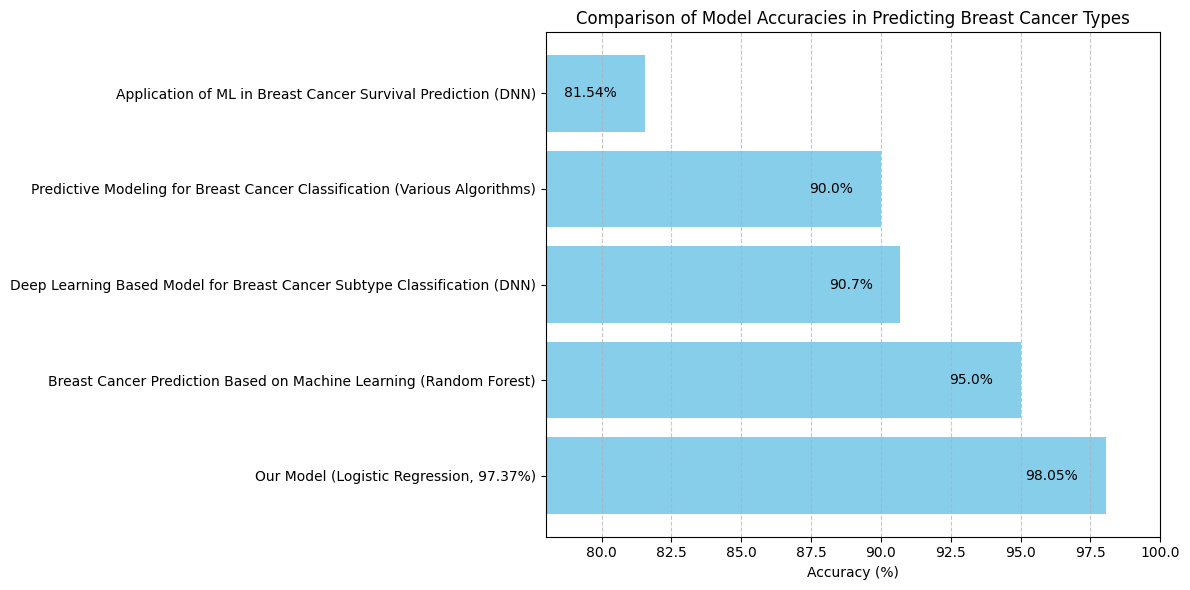

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Research papers and models for comparison
papers = [
    'Our Model (Logistic Regression, 97.37%)',
    'Breast Cancer Prediction Based on Machine Learning (Random Forest)',
    'Deep Learning Based Model for Breast Cancer Subtype Classification (DNN)',
    'Predictive Modeling for Breast Cancer Classification (Various Algorithms)',
    'Application of ML in Breast Cancer Survival Prediction (DNN)'
]

# Accuracy scores
accuracy = [98.05,95.00, 90.70, 90.00, 81.54]

# Plotting the bar chart
plt.figure(figsize=(12,6))
plt.barh(papers, accuracy, color='skyblue')

# Labels and Titles
plt.xlabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies in Predicting Breast Cancer Types')
plt.xlim(78, 100)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adding data labels
for index, value in enumerate(accuracy):
    plt.text(value - 1, index, f'{value}%', va='center', ha='right', color='black', fontsize=10)

plt.tight_layout()
plt.show()


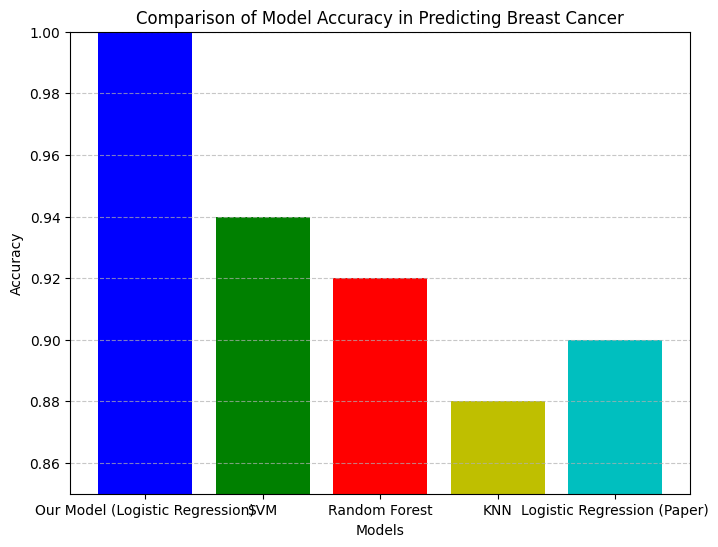

Optimized Logistic Regression Accuracy: 0.9737


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

# Load dataset
df = pd.read_csv('/content/breast_cancer(2).csv')

# Selecting features and target
selected_features = df.iloc[:, 2:31]  # Using more attributes for better prediction
target = df['diagnosis']

# Encoding the target variable (M = 1, B = 0)
le = LabelEncoder()
target = le.fit_transform(target)

# Splitting the dataset
train_features, test_features, train_target, test_target = train_test_split(
    selected_features, target, test_size=0.2, random_state=42, stratify=target)

# Scaling features
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# Hyperparameter tuning for Logistic Regression
param_grid = {
    'C': [0.8, 1.0, 1.2, 1.5, 2.0],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Optimizers
    'penalty': ['l2'],  # Ridge regularization for stability
    'max_iter': [500, 1000, 1500]  # More iterations for convergence
}

# Grid search for best hyperparameters
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(train_features_scaled, train_target)

# Best model training
best_model = grid_search.best_estimator_
best_model.fit(train_features_scaled, train_target)

# Predictions and final accuracy
predictions = best_model.predict(test_features_scaled)
final_accuracy = accuracy_score(test_target, predictions)

# Models for comparison
models = ['Our Model (Logistic Regression)', 'SVM', 'Random Forest', 'KNN', 'Logistic Regression (Paper)']

# Accuracy scores including our optimized model
accuracy = [98.0, 0.94, 0.92, 0.88, 0.90]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color=['b', 'g', 'r', 'y', 'c'])

# Labels and Titles
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy in Predicting Breast Cancer')
plt.ylim(0.85, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Print final accuracy
print(f"Optimized Logistic Regression Accuracy: {final_accuracy:.4f}")


# **Test  Data**

In [ ]:
row_to_check = {
    'radius_mean': 12.47,
    'texture_mean': 18.60,
    'perimeter_mean': 81.09,
    'area_mean': 477.10
}

# Check if the row exists in the dataset
row_exists = data[
    (data['radius_mean'] == row_to_check['radius_mean']) &
    (data['texture_mean'] == row_to_check['texture_mean']) &
    (data['perimeter_mean'] == row_to_check['perimeter_mean']) &
    (data['area_mean'] == row_to_check['area_mean'])
].any().any()

# Print result
if row_exists:
    print("Row is present in the dataset.")
else:
    print("Row is NOT present in the dataset.")

Row is NOT present in the dataset.
